In [0]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.nn import Parameter



In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd /content/drive/My\ Drive/DeepLearning/InvNet/

/content/drive/My Drive/DeepLearning/InvNet


In [0]:
ls

A1_400_InvNet.pt  A1_InvNet.pt  A2_200_InvNet.pt  InvNet.pt  MNIST/


In [0]:
class  MnistDataset(Dataset):
    
    def __init__(self, data_path = './', transform = None):
        self.transform = transform
        mnist = torchvision.datasets.MNIST(root="./", download=False, transform=None)
        self.image=[]
        self.label=[]
        for i in mnist:
          self.image.append(np.array(i[0], dtype=np.float32))
          self.label.append(i[1])
        self.image=np.array(self.image)
        self.label=np.array(self.label).reshape(-1,1)
                
    def __len__(self):
        return self.label.shape[0]
    
    def __getitem__(self, i):
        assert 0<=i<len(self), f'i={i} corresponding to item number {i+1} exceeds size of the dataset that is {self.__len__()}'
        image = self.image[i]
        label = self.label[i]
        if self.transform:
            image = self.transform(image)
        else:
            image = image/255.
        image=torch.tensor(image, dtype=torch.float32)
        hotlabel=torch.torch.zeros((10),dtype=torch.float32)
        hotlabel[label]=1.0
        return image, hotlabel


In [0]:
class MyModel(nn.Module): # your model is inheriting from the base class
    def __init__(self, infeatures): # infeatures is the size of input features
                                              # nclasses is the number of classes
        super().__init__()
        self.infeatures = infeatures
        self.fc1 = nn.Linear(self.infeatures, 100)
        self.a1  = 0
        self.fc2 = nn.Linear(100, 50)
        self.a2  = 0
        self.fc3 = nn.Linear(50, 10)
        self.a3  = 0
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
    
    def forward(self, x): # forward method of base class 'Module' overridden here
                          # size of x is (batch_size, infeatures)
        self.a1 = self.relu(self.fc1(x))
        self.a2 = self.relu(self.fc2(self.a1))
        self.a3 = self.fc3(self.a2)
        return self.softmax(self.a3) # size of x here is (batch_size, 1)

In [0]:
def flatten(z):
    m, h, w= z.size()
    nx = h*w
    z = z.view((m, nx))
    return z 
def init_params(m):
  if type(m) == nn.Linear:
    m.weight.data = torch.randn(m.weight.size())*.01
    m.bias.data = torch.zeros(m.bias.size())



In [0]:
def train(model, dataloader, optimizer, loss_criterion, num_epoch):
  for epoch in range(num_epoch):
    total_loss=0
    for images,labels in dataloader:
      if torch.cuda.is_available(): # if gpu available,
        images = images.to(device = 'cuda') 
        labels = labels.to(device = 'cuda') # move batch of images and labels to gpu memory
      images = flatten(images) # flatten the batch of images since our model is fully connected
      outputs = model(images) # do forward propagation
      loss = loss_criterion(outputs.squeeze(), labels) # compute loss
      optimizer.zero_grad() # make sure gradients of parameters are zeroed before backpropagation to avoid accumulation
      loss.backward() # do the backpropagation
      total_loss+=loss.item()
      optimizer.step() # update the parameters
    print(f'Training loss at epoch {epoch+1}:\t{total_loss}')
      
    if epoch%25 == 0:
      print(f'Training loss at epoch {epoch+1}:\t{loss.item()}')
      

  

In [0]:
def main():
  mymodel = MyModel(784) # instantiate the model
  mymodel.apply(init_params) # initialize parameters
  if torch.cuda.is_available():
    print('GPU is available')
    mymodel = mymodel.to(device = 'cuda') # move entire model to gpu memory; all its parameters, buffers are moved to gpu memory
  loss_criterion = nn.BCELoss() # instantiate the loss criterion; since we are doing binary classification, we will use binary cross entropy loss
  optimizer = optim.SGD(mymodel.parameters(), lr=0.008) # instantiate optimizer; here we are using stochastic gradient descent 
                                                                  # with learning rate as 0.008 
    
  dset = MnistDataset()
  train_loader = DataLoader(dset, batch_size=64, shuffle=True, num_workers=4)
  ########################################################################
  
  train(mymodel, train_loader,  optimizer,  loss_criterion,200)
  return mymodel
if __name__ == '__main__'  :
  mymodel = main()
  torch.save(mymodel, './InvNet.pt')

GPU is available


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training loss at epoch 1:	304.9113145470619
Training loss at epoch 1:	0.32505694031715393
Training loss at epoch 2:	304.8867436349392
Training loss at epoch 3:	304.865565598011
Training loss at epoch 4:	304.84683683514595
Training loss at epoch 5:	304.8300131857395
Training loss at epoch 6:	304.8150181174278
Training loss at epoch 7:	304.8015117943287
Training loss at epoch 8:	304.7893039882183
Training loss at epoch 9:	304.7770801484585
Training loss at epoch 10:	304.7664621770382
Training loss at epoch 11:	304.755616992712
Training loss at epoch 12:	304.74469646811485
Training loss at epoch 13:	304.73357170820236
Training loss at epoch 14:	304.7233440876007
Training loss at epoch 15:	304.7102679014206
Training loss at epoch 16:	304.6986294090748
Training loss at epoch 17:	304.6849784255028
Training loss at epoch 18:	304.66923916339874
Training loss at epoch 19:	304.6538353860378
Training loss at epoch 20:	304.63471043109894
Training loss at epoch 21:	304.61372447013855
Training loss 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type MyModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
class LearningA1(nn.Module): # your model is inheriting from the base class
    def __init__(self, infeatures): # infeatures is the size of input features
        super().__init__()
        self.infeatures = infeatures
        self.fc1 = nn.Linear(self.infeatures, 784)
        self.relu = nn.ReLU()
      
    def forward(self, x): # forward method of base class 'Module' overridden here
        return self.relu(self.fc1(x)) # size of x here is (batch_size, 1)

In [0]:
def TrainA1(model, dataloader, optimizer, loss_criterion, num_epoch):
  m=torch.load("./InvNet.pt")
  for epoch in range(num_epoch):
    for images,labels in dataloader:
      if torch.cuda.is_available(): # if gpu available,
        images=flatten(images)
        images = images.to(device = 'cuda') 
        _ = m(images) # move batch of images and labels to gpu memory
        inp=m.a1
      outputs = model(inp) # do forward propagation
      loss = loss_criterion(outputs, images) # compute loss
      optimizer.zero_grad() # make sure gradients of parameters are zeroed before backpropagation to avoid accumulation
      loss.backward() # do the backpropagation
      optimizer.step() # update the parameters
      
    if epoch%25 == 0:
      print(f'Training loss at epoch {epoch+1}:\t{loss.item()}')
      

  

In [0]:
def A1main():
  mymodel = LearningA1(100) # instantiate the model
  #mymodel=torch.load("./A1_InvNet.pt")
  mymodel.apply(init_params) # initialize parameters
  if torch.cuda.is_available():
    print('GPU is available')
    mymodel = mymodel.to(device = 'cuda') # move entire model to gpu memory; all its parameters, buffers are moved to gpu memory
  loss_criterion = nn.MSELoss() # instantiate the loss criterion; since we are doing binary classification, we will use binary cross entropy loss
  optimizer = optim.Adam(mymodel.parameters(), lr=0.001) # instantiate optimizer; here we are using stochastic gradient descent 
                                                                  # with learning rate as 0.008 
    
  dset = MnistDataset()
  train_loader = DataLoader(dset, batch_size=64, shuffle=True, num_workers=4)
  ########################################################################
  
  TrainA1(mymodel, train_loader,  optimizer,  loss_criterion,400)
  return mymodel
mymodel = A1main()
torch.save(mymodel, './A1_400_InvNet.pt')

GPU is available


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training loss at epoch 1:	0.028365951031446457
Training loss at epoch 26:	0.030842259526252747
Training loss at epoch 51:	0.027769960463047028
Training loss at epoch 76:	0.0307251438498497
Training loss at epoch 101:	0.02571636065840721
Training loss at epoch 126:	0.023425234481692314
Training loss at epoch 151:	0.023020146414637566
Training loss at epoch 176:	0.0244720708578825
Training loss at epoch 201:	0.025819486007094383
Training loss at epoch 226:	0.022736364975571632
Training loss at epoch 251:	0.027542462572455406
Training loss at epoch 276:	0.02840174175798893
Training loss at epoch 301:	0.02747371792793274
Training loss at epoch 326:	0.02206338196992874
Training loss at epoch 351:	0.025450462475419044
Training loss at epoch 376:	0.02487911470234394


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LearningA1. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
class LearningA2(nn.Module): # your model is inheriting from the base class
    def __init__(self, infeatures): # infeatures is the size of input features
        super().__init__()
        self.infeatures = infeatures
        self.fc1 = nn.Linear(self.infeatures, 100)
        self.relu = nn.ReLU()
      
    def forward(self, x): # forward method of base class 'Module' overridden here
        return self.relu(self.fc1(x)) # size of x here is (batch_size, 1)

In [0]:
def TrainA2(model, dataloader, optimizer, loss_criterion, num_epoch):
  m=torch.load("./InvNet.pt")
  for epoch in range(num_epoch):
    for images,labels in dataloader:
      if torch.cuda.is_available(): # if gpu available,
        images=flatten(images)
        images = images.to(device = 'cuda') 
        _ = m(images) # move batch of images and labels to gpu memory
        inp=m.a2
        
      outputs = model(inp) # do forward propagation
      loss = loss_criterion(outputs, m.a1) # compute loss
      optimizer.zero_grad() # make sure gradients of parameters are zeroed before backpropagation to avoid accumulation
      loss.backward() # do the backpropagation
      optimizer.step() # update the parameters
      
    if epoch%25 == 0:
      print(f'Training loss at epoch {epoch+1}:\t{loss.item()}')
      

  

In [0]:
def A2main():
  mymodel = LearningA2(50) # instantiate the model
  #mymodel=torch.load("./A2_InvNet.pt")
  mymodel.apply(init_params) # initialize parameters
  if torch.cuda.is_available():
    print('GPU is available')
    mymodel = mymodel.to(device = 'cuda') # move entire model to gpu memory; all its parameters, buffers are moved to gpu memory
  loss_criterion = nn.MSELoss() # instantiate the loss criterion; since we are doing binary classification, we will use binary cross entropy loss
  optimizer = optim.Adam(mymodel.parameters(), lr=0.001) # instantiate optimizer; here we are using stochastic gradient descent 
  dset = MnistDataset()
  train_loader = DataLoader(dset, batch_size=64, shuffle=True, num_workers=4)
  ########################################################################
  TrainA2(mymodel, train_loader,  optimizer,  loss_criterion,200)
  return mymodel
mymodel = A2main()
torch.save(mymodel, './A2_200_InvNet.pt')

GPU is available


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training loss at epoch 1:	0.07188982516527176
Training loss at epoch 26:	0.05386488139629364
Training loss at epoch 51:	0.045237913727760315
Training loss at epoch 76:	0.06326322257518768
Training loss at epoch 101:	0.05202741548418999
Training loss at epoch 126:	0.056379370391368866
Training loss at epoch 151:	0.051098380237817764
Training loss at epoch 176:	0.040676362812519073


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LearningA2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
dset = MnistDataset()
train_loader = DataLoader(dset, batch_size=64, shuffle=True, num_workers=4)
for i,l in train_loader:
  break
print(i.size())

torch.Size([64, 28, 28])


In [0]:
m2=torch.load("./A2_200_InvNet.pt")
m1=torch.load("./A1_InvNet.pt")
model=torch.load("./InvNet.pt")


In [0]:
_=model(flatten(i.to(device='cuda')))
temp=m1(m2(model.a2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
m.a3.size()

torch.Size([32, 10])

In [0]:
|for i in m2.parameters():
  print(i.size())

torch.Size([100, 50])
torch.Size([100])


In [0]:
torch.norm(m2(model.a2)-model.a1)

tensor(25.8570, device='cuda:0', grad_fn=<NormBackward0>)

In [0]:
temp=temp.view(-1, 28,28)
temp.size()

torch.Size([64, 28, 28])

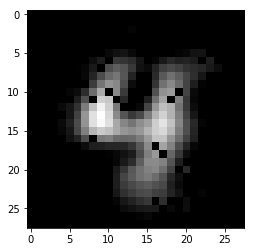

In [0]:
plt.imshow(temp[44].detach().to(device='cpu')*255, cmap='gray')

In [0]:
class LearningA3(nn.Module): # your model is inheriting from the base class
    def __init__(self, infeatures): # infeatures is the size of input features
        super().__init__()
        self.infeatures = infeatures
        self.fc1 = nn.Linear(self.infeatures, 50)
        self.relu = nn.ReLU()
        self.C = Parameter(torch.FloatTensor(1))
    def forward(self, x): # forward method of base class 'Module' overridden here
        a3=torch.log(1/(x*self.C))
        return self.relu(self.fc1(x)) # size of x here is (batch_size, 1)

In [0]:
def TrainA3(model, dataloader, optimizer, loss_criterion, num_epoch):
  m=torch.load("./InvNet.pt")
  for epoch in range(num_epoch):
    for images,labels in dataloader:
      if torch.cuda.is_available(): # if gpu available,
        images=flatten(images)
        images = images.to(device = 'cuda') 
        out = m(images) # move batch of images and labels to gpu memory
      outputs = model(out) # do forward propagation
      loss = loss_criterion(outputs, m.a2) # compute loss
      optimizer.zero_grad() # make sure gradients of parameters are zeroed before backpropagation to avoid accumulation
      loss.backward() # do the backpropagation
      optimizer.step() # update the parameters
      
    if epoch%25 == 0:
      print(f'Training loss at epoch {epoch+1}:\t{loss.item()}')
      

  

In [0]:
def A3main():
  mymodel = LearningA3(10) # instantiate the model
  #mymodel=torch.load("./A2_InvNet.pt")
  mymodel.apply(init_params) # initialize parameters
  if torch.cuda.is_available():
    print('GPU is available')
    mymodel = mymodel.to(device = 'cuda') # move entire model to gpu memory; all its parameters, buffers are moved to gpu memory
  loss_criterion = nn.MSELoss() # instantiate the loss criterion; since we are doing binary classification, we will use binary cross entropy loss
  optimizer = optim.Adam(mymodel.parameters(), lr=0.001) # instantiate optimizer; here we are using stochastic gradient descent 
  dset = MnistDataset()
  train_loader = DataLoader(dset, batch_size=64, shuffle=True, num_workers=4)
  ########################################################################
  TrainA3(mymodel, train_loader,  optimizer,  loss_criterion,200)
  return mymodel
mymodel = A3main()
torch.save(mymodel, './A3_200_InvNet.pt')

GPU is available


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training loss at epoch 1:	2.424455165863037
Training loss at epoch 26:	0.49629804491996765
Training loss at epoch 51:	0.5911151766777039
Training loss at epoch 76:	0.4433543384075165
Training loss at epoch 101:	0.6349992752075195
Training loss at epoch 126:	0.7711682915687561
Training loss at epoch 151:	0.49467524886131287
Training loss at epoch 176:	0.7743874788284302


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LearningA3. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
m2=torch.load("./A2_200_InvNet.pt")
m1=torch.load("./A1_InvNet.pt")
m=torch.load("./A3_200_InvNet.pt")
model=torch.load("./InvNet.pt")


In [0]:
model=torch.load("./InvNet.pt")


In [0]:
model.fc1.weight = torch.nn.Parameter(torch.transpose( model.fc1.weight, 0,1))

In [0]:
model.fc1.weight.size()

torch.Size([784, 100])

In [0]:
out=model(flatten(i.to(device='cuda')))
temp=m1(m2(m0(out)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


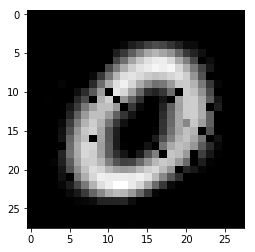

In [0]:
plt.imshow(temp[8].detach().to(device='cpu').view(28,28), cmap='gray')

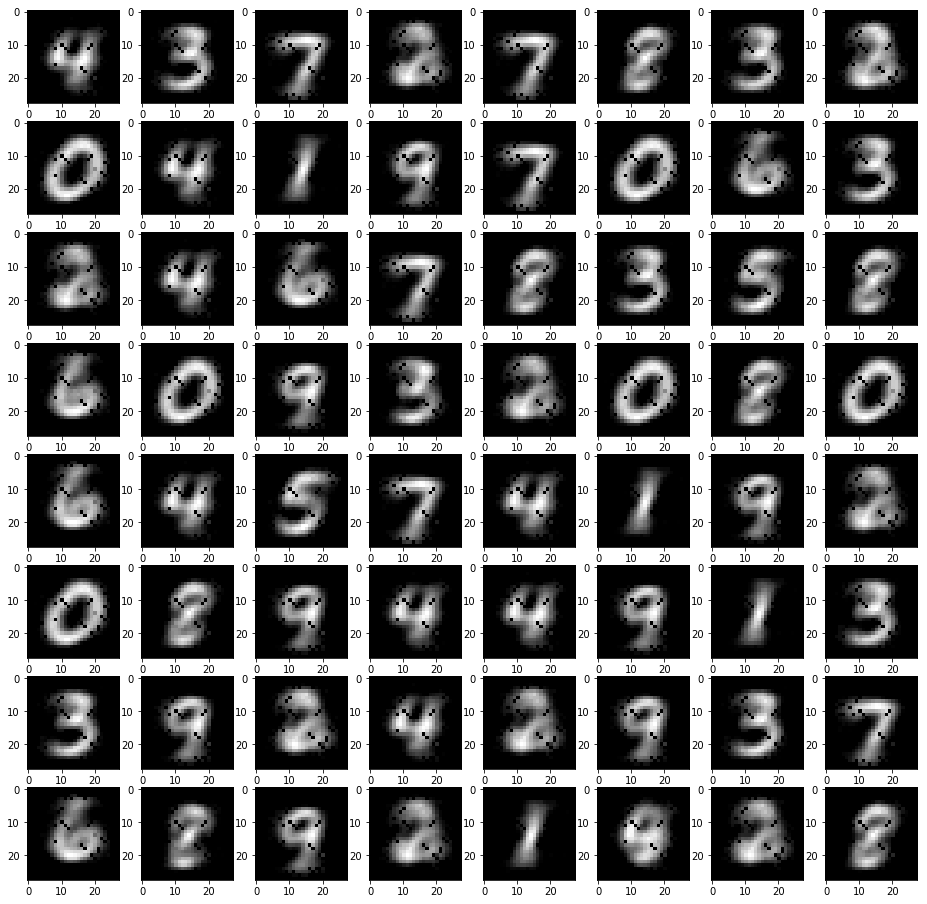

In [0]:
fig, axes = plt.subplots(8,8)
fig.set_figwidth(16)
fig.set_figheight(16)
for i in range(8):
   for j in range(8):
      axes[i,j].imshow(temp[i*8+j].detach().to(device='cpu').view(28,28), cmap='gray')
     

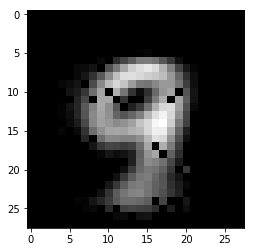

In [0]:
img=m1(m2(m0(torch.tensor([0,0,0,0,0,0,0,0,0,1], dtype=torch.float32).to(device='cuda'))))
plt.imshow(img.detach().to(device='cpu').view(28,28), cmap='gray')
     

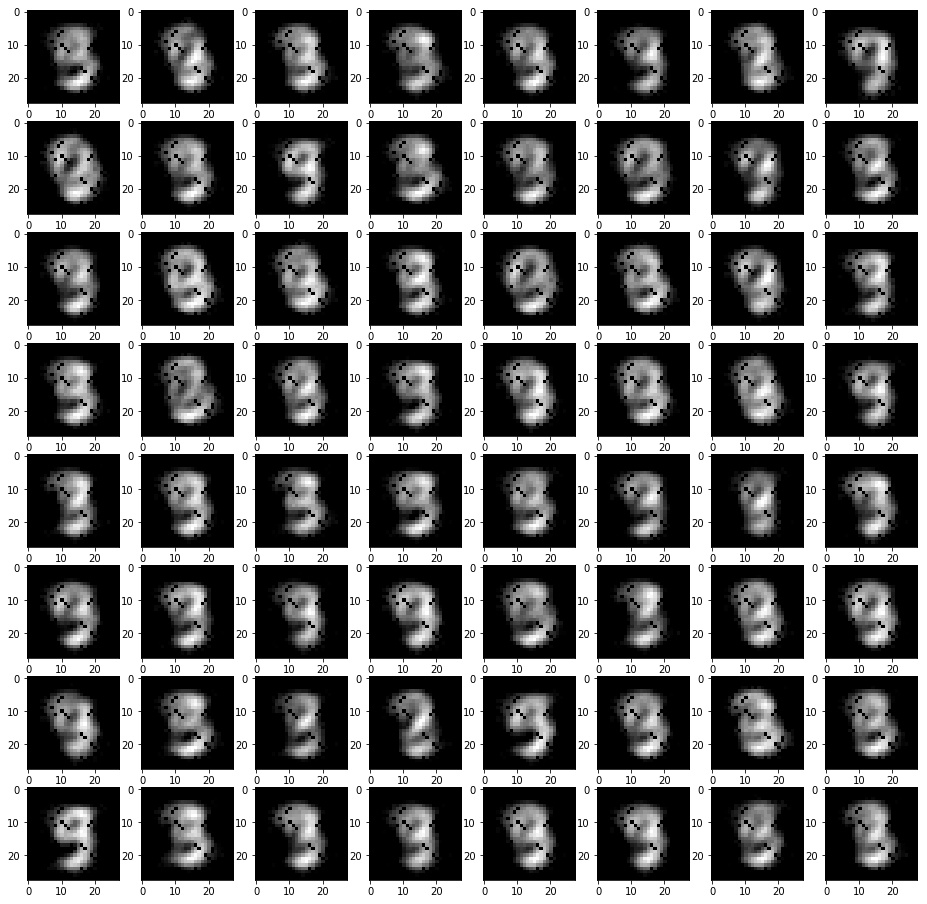

In [0]:
fig, axes = plt.subplots(8,8)
fig.set_figwidth(16)
fig.set_figheight(16)
for i in range(8):
   for j in range(8):
      img=m1(m2(m0(torch.rand(10).to(device='cuda'))))
      axes[i,j].imshow(img.detach().to(device='cpu').view(28,28)*255, cmap='gray')
     

In [0]:
torch.rand(10)

tensor([0.3725, 0.6469, 0.0973, 0.9589, 0.6351, 0.6887, 0.4736, 0.0683, 0.1698,
        0.6383])